In [1]:
#Realizando as importações necessárias para o projeto
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import scipy.stats as st
from collections import Counter
import statistics as static

In [2]:
#Lendo o dataset, lembrando que o mesmo deverá ser colocado na pasta raiz
dados = pd.read_csv('/content/ocorrencia.csv', sep=";")

In [3]:
#Indicação de quantas linhas e quantas colunas nossa planilha possui
dados.shape

(5167, 22)

In [14]:
#Leitura das 5 primeiras linhas do nosso dataset
dados.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO


In [15]:
def numero_em_cima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [16]:
#Separando as ocorrências por região
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
ocorrencia_classificacao	 = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(dados.loc[dados['ocorrencia_classificacao'] == i, ['ocorrencia_uf']]['ocorrencia_uf'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in ocorrencia_classificacao}

dic_01['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

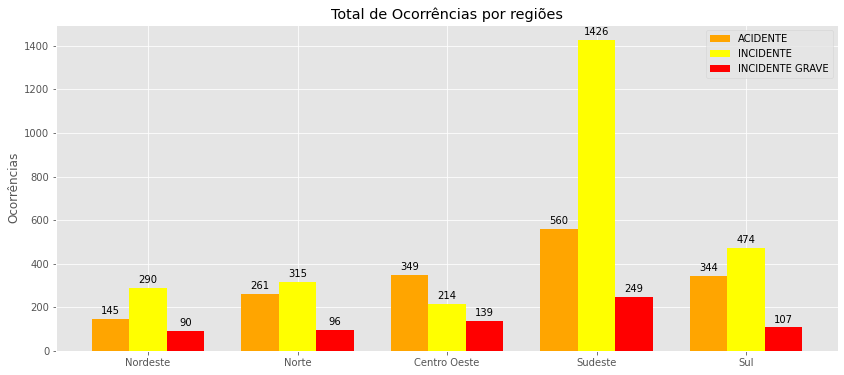

In [17]:
#Mensurando em gráfico tipo "Bar" as classificações das ocorrência por região
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

rects1 = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE', color='orange')
rects2 = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE' , color='yellow')
rects3 = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE' , color='red')

ax.set_ylabel('Ocorrências')
ax.set_title('Total de Ocorrências por regiões')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)
numero_em_cima(rects3, ax)

plt.show()

No gráfico acima, podemos perceber que na região Sudeste temos mais ocorrências no que se refente a incidentes, acidentes e indicentes graves. Com isso, a região sudeste está denominada como a mais perigosa, já que em relação as demais, ultrapassa todos os requisitos informado na tabela.
Em sequencia temos a região centro oeste, denominada como a segunda região mais perigosa no que se refere a acidentes e incidentes, só ficando atrás da região sul em relação a ocorrências "indicentes graves".
Por fim, temos as regiões norte e nordeste, que tem os menores números em relação as demais regiões citadas anteriomente. E das duas, a região nordeste está classifica como a menor região em relação as occorências informadas na legenda no gráfico.

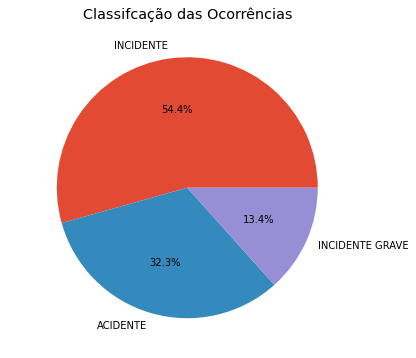

In [18]:
#Mensurando o percentual de occorência pela classifcação(Acidente, Incidente e Incidente grave)
plt.style.use("ggplot")
plt.title('Classifcação das Ocorrências')

dados['ocorrencia_classificacao'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label=" " ,figsize=(6, 6))
plt.show()

No gráfico acima, podemos perceber que a classificação referente ao incidente mostram 54,4% dos status de investigação referente as ocorrências recebidas. 
Já em segundo, vem classificado os acidentes denominado por 32,3% das queixas recebidas e que mostram na classificação do gráfico. E o menos recebido, vem os incidentes graves que denomina 13,4%.. totalizando 100% das investigações classificadas no gráfico.

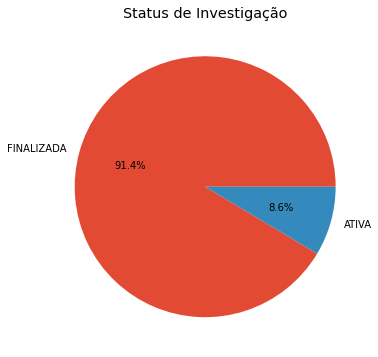

In [19]:
#Mensurando em gráfico tipo "Pie" os status das investigações
plt.style.use("ggplot")
plt.title('Status de Investigação')

dados['investigacao_status'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label=" " ,figsize=(6, 6))
plt.show()

No gráfico acima, podemos perceber que as investigações que foram concluídas, ou seja finalizadas, são um total de 91,4% referente aeronaves liberadas. 
Com tudo, o restante ou seja, 8,6% das investigações referente a aeronaves, não foram liberadas.

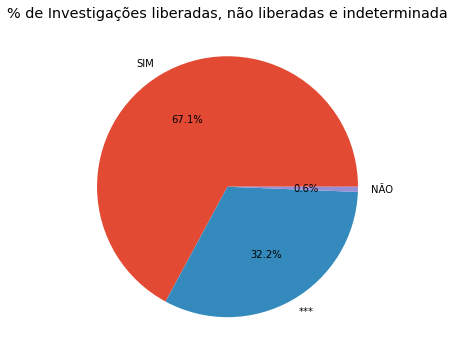

In [20]:
#Mensurando em gráfico tipo "Pie" se as investigações da aeronaves já foram ou não liberadas 
plt.style.use("ggplot")
plt.title('% de Investigações liberadas, não liberadas e indeterminada')
dados['investigacao_aeronave_liberada'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label=" " ,figsize=(6, 6))
plt.show()

No gráfico acima podemos ver que 67,1% das investigações de arenonaves já foram liberadas e temos 32,2% que foram dadas como indeterminada, apenas 0,6% foi dada como "Não Liberada". 

In [21]:
#Utilizando o Coueter para contar quantas ocrrências houveram por estado
estado = Counter(dados['ocorrencia_uf'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

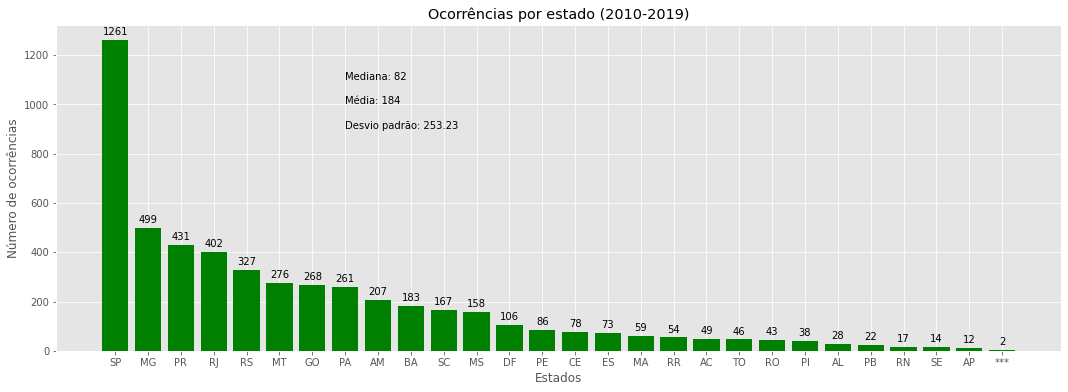

In [25]:
#Mensurando em gráfico tipo "Bar" todas ocorrências em seus respectivos estados
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase_estado
y=contador_estado

rects1=ax.bar(x, y,color='green')

ax.set_xticks(x)
plt.xlabel("Estados")
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por estado (2010-2019)')
plt.text(7, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))))
plt.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))))
plt.text(7, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)))   

numero_em_cima(rects1, ax)

plt.show()

O maior índice disparadamente foi em SP,atingindo 1261 ocorrências, já em MG, PR e RJ por volta de 400 ocorrências, no total tivemos uma média de 184 ocorrências por ano


In [23]:
#Utilizando o Coueter para contar quantas ocrrências houveram por cidade
cidade = Counter(dados['ocorrencia_cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador_cidade = sorted(list(cidade.values()), reverse = True)

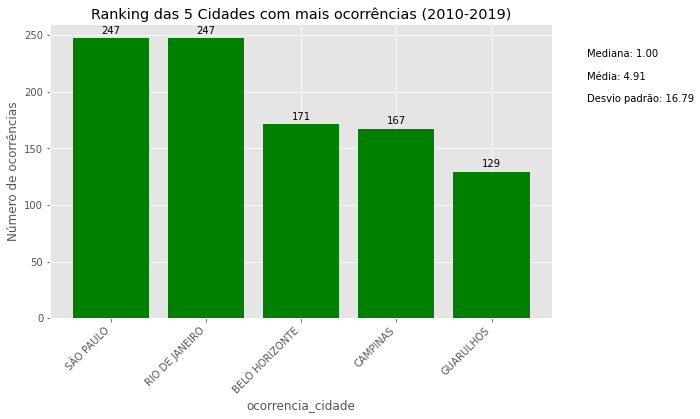

In [24]:
#Mensurando em gráfico tipo "Bar" as a 5 cidades que possuem mais ocorrências
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(9, 6))

x=fase_cidade[:5]
y=contador_cidade[:5]

rects1=ax.bar(x, y, color='green')

plt.xlabel('Cidades')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('Ranking das 5 Cidades com mais ocorrências (2010-2019)')
plt.text(5, 210.9, 'Média: %.2f'%(np.mean(np.array(contador_cidade))))
plt.text(5, 230.9, 'Mediana: %.2f'%(np.median(np.array(contador_cidade))))
plt.text(5, 190.8, 'Desvio padrão: %.2f'%(static.stdev(contador_cidade)))   

numero_em_cima(rects1, ax)

plt.show()

No diagrama acima podemos ver que São Paulo e Rio de Janeiro estão disparados em primeiro lugar, sendo 247 cada , logo em seguida vem as cidades de Belo Horizonte e Campinas por volta dos 171 e 197 ocorrências respectivamente, e na úma posição a cidade de guarulhos com apenas 129 ocorrências. 
